In [30]:
import numpy as np
import ot
import time 
import matplotlib.pyplot as plt
from utils.utils import *
from scipy.stats import norm, sem, t

In [123]:
res = 100
lin_space = np.linspace(0, 1, res)
x = norm.pdf(lin_space, 0.35, 0.1)
x = x / x.sum()
y = norm.pdf(lin_space, 0.65, 0.1)
y = y / y.sum()
c = get_distance_matrix(res, 'L1')

In [124]:
ppf_x = np.cumsum(x)
ppf_y = np.cumsum(y)

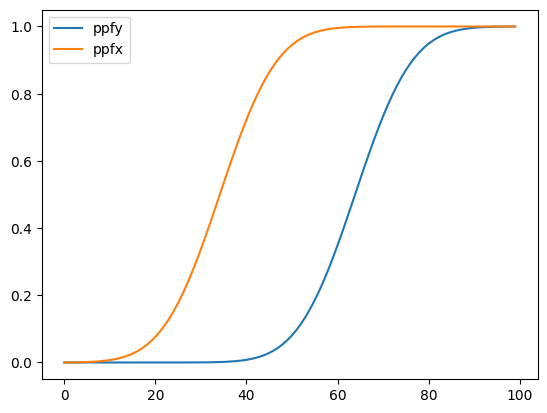

In [125]:
plt.plot(ppf_y, label='ppfy')
plt.plot(ppf_x, label='ppfx')
plt.legend()
plt.show()

In [126]:
def Wasserstein_p(p, u, v):
    assert len(u) == len(v)
    return (np.sum((np.abs(u - v)) ** p)) ** (1 / p)

In [127]:
res_pot = ot.emd2(x, y, c, numItermax=1000000)
print(f'The resolution for pot library emd is : {res_pot}')

The resolution for pot library emd is : 0.29985462063225293


This results in 0.09 since each element is moved 0.3 and the distance is squared.

In [128]:
res_w = Wasserstein_p(1, ppf_x, ppf_y)
print(res_w)

29.68560744259305


In [129]:
res_pot * 0.99

0.2968560744259304

For some reason, I'm 1% off when comparing W1 to something else. 
Either way, simply taking $L_2$ as a distance metric does not turn what we're searching for into $W_2$. 
I need to understand this, and how exactly I should approach $W_p$